### CNN

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
alpha = 0.01
num = 10
batch_len = 5
correct_number = 0
total_number = 0
correctArr = [0 for i in range(10)]
totalArr = [0 for i in range(10)]

In [3]:
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [186]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transforms.ToTensor(),  download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transforms.ToTensor())

Files already downloaded and verified


In [187]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_len,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_len,shuffle=False)

In [188]:
dataiter = iter(train_loader)
img, labels = next(dataiter)
img.shape

torch.Size([5, 3, 32, 32])

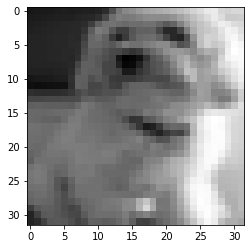

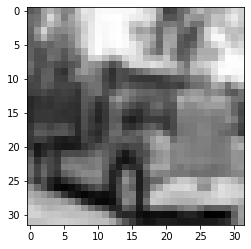

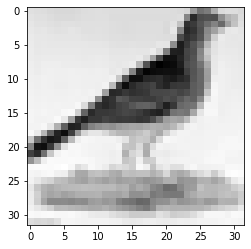

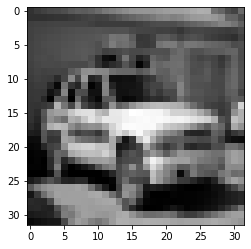

In [189]:
for i in range(4):
    plt.imshow(img[i][2],cmap='gray')
    plt.show()

# CNN

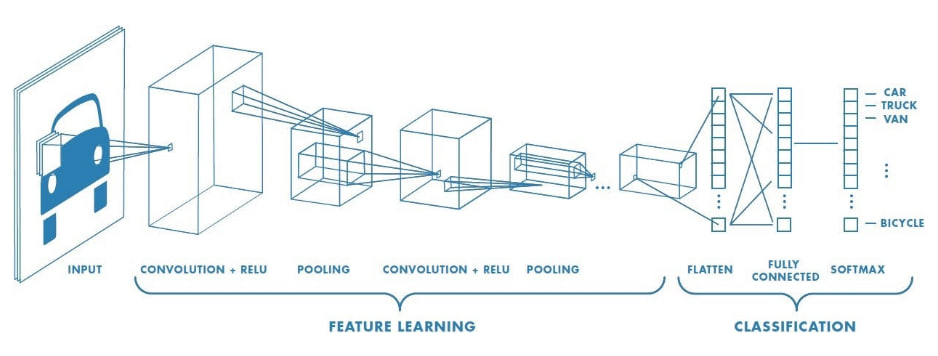

In [2]:
Image(filename='4.jpg')

In [190]:
class ConvNet(nn.Module):
    def __init__(self):

        super(ConvNet, self).__init__()
        self.cnv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.cnv2 = nn.Conv2d(6, 16, 5)
        self.f1 = nn.Linear(400, 120)
        self.f2 = nn.Linear(120, 84)
        self.f3 = nn.Linear(84,40)
        self.f4 = nn.Linear(40, 10)

    def forward(self, x):  

        out = self.cnv1(x)
        out = torch.relu(out)
        out = self.pool(out)
        out = self.cnv2(out)
        out = torch.relu(out)
        out = self.pool(out)
        out = out.reshape(-1,400)              
        out = self.f1(out)
        out = torch.relu(out)             
        out = self.f2(out)
        out = torch.relu(out)               
        out = self.f3(out) 
        out = torch.relu(out)
        out = self.f4(out)
        out = torch.relu(out)                      
        return out

model = ConvNet()

In [191]:
loss = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters() , lr=alpha)

In [192]:
cnt = 0
for epoch in range(num):
    for index , (img , labl) in enumerate(train_loader):
        
        prd = model(img)
        ls = loss(prd , labl)
        ls.backward()

        optim.step()
        optim.zero_grad()

        cnt = cnt + 1
        
        if (index % 4200 == 0):
            print(cnt ,'. ' , "Loss = " , ls.item())

1 .  Loss =  2.2857413291931152
4201 .  Loss =  2.3000826835632324
8401 .  Loss =  2.300760269165039
10001 .  Loss =  2.3008265495300293
14201 .  Loss =  2.189152956008911
18401 .  Loss =  2.3806862831115723
20001 .  Loss =  1.8504111766815186
24201 .  Loss =  1.8687753677368164
28401 .  Loss =  1.335688829421997
30001 .  Loss =  1.6216919422149658
34201 .  Loss =  1.9552280902862549
38401 .  Loss =  1.7572304010391235
40001 .  Loss =  1.8554719686508179
44201 .  Loss =  0.5282415151596069
48401 .  Loss =  0.709067702293396
50001 .  Loss =  1.6695963144302368
54201 .  Loss =  1.4983845949172974
58401 .  Loss =  0.4372996687889099
60001 .  Loss =  1.4052650928497314
64201 .  Loss =  0.733781099319458
68401 .  Loss =  0.9121414422988892
70001 .  Loss =  0.6356526613235474
74201 .  Loss =  0.9425399899482727
78401 .  Loss =  0.9183346033096313
80001 .  Loss =  1.0092127323150635
84201 .  Loss =  1.3427985906600952
88401 .  Loss =  1.1158018112182617
90001 .  Loss =  1.1022762060165405
942

In [193]:
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

In [194]:
with torch.no_grad():
    for img, labels in test_loader:
        pred = model(img)

        _, predict = torch.max(pred, 1)
        total_number += labels.size(0)
        correct_number += (predict == labels).sum().item()
        
        for i in range(batch_len):
            if (labels[i] == predict[i]):
                correctArr[labels[i]] += 1
            totalArr[labels[i]] += 1

    accuracy = (100.0 * (correct_number / total_number))
    print("Accuracy of the neural network is = " , accuracy,"%")

    for i in range(10):
        accuracy = 100.0 * correctArr[i] / totalArr[i]
        print("Accuracy of ",classes[i]," is : ", accuracy, "%")

Accuracy of the neural network is =  60.35 %
Accuracy of  plane  is :  59.8 %
Accuracy of  car  is :  79.4 %
Accuracy of  bird  is :  42.2 %
Accuracy of  cat  is :  40.5 %
Accuracy of  deer  is :  63.9 %
Accuracy of  dog  is :  46.9 %
Accuracy of  frog  is :  66.3 %
Accuracy of  horse  is :  61.5 %
Accuracy of  ship  is :  79.6 %
Accuracy of  truck  is :  63.4 %
